In [7]:
import pickle
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
import cv2


In [3]:
with open('./image_generator.pkl', 'rb') as f:
    model = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-24 17:16:54         1954
metadata.json                                  2023-03-24 17:16:54           64
variables.h5                                   2023-03-24 17:16:56    311460928
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [19]:
#number of images in the dataset , 16 in this folder
y = 16


In [35]:
def make_input_vec(val):
    vec = []
    for i in range(0,y):
        vec.append(0)
    vec[val]=1
    return np.asarray(vec)

In [36]:
def make_multiple_input():
    i1 = random.randint(0,y-1)
    i2 = random.randint(0,y-1)
    v = make_input_vec(i1)
    v[i2]=1
    return np.asarray([v])

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]]
1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


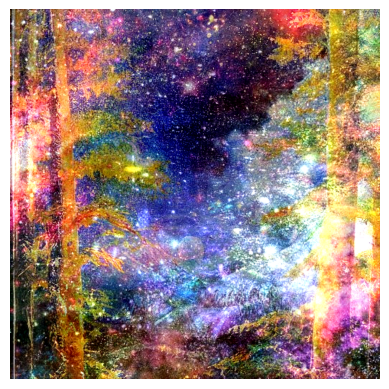

In [52]:
val = make_multiple_input()
print(val)
res = model.predict(val)
res = res.reshape(512,512,3)
pic = cv2.resize(res,(1080,1080))
pic = pic 
sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharp_pic = cv2.filter2D(pic, -1, sharpen_filter)
sharp_pic = cv2.filter2D(pic, -1, sharpen_filter)
plt.axis('off')
plt.imshow(sharp_pic)